## 데이터 준비: 다듬기, 변형, 병합, 변형

In [2]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

In [3]:
%matplotlib inline

## 데이터 병합

### 데이터베이스 스타일 DataFrame 병합

In [4]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [5]:
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [6]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [ ]:
pd.merge(df1, df2, on='key')

열의 공통 이름이 없는 경우

In [4]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


합집합은 outer join으로 설정

In [8]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0
6,3,c,NaN
7,NaN,d,2


N-대-N 조합

In [9]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [10]:
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [11]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,2,a,0
5,2,a,2
6,3,c,NaN
7,4,a,0
8,4,a,2
9,5,b,1


In [ ]:
pd.merge(df1, df2, how='inner')

In [ ]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

In [ ]:
pd.merge(left, right, on='key1')

In [ ]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

### 인덱스 기준 합치기

In [39]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [40]:
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
right1

,group_val
a,3.5
b,7.0


In [41]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

In [ ]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
lefth

In [ ]:
righth

In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

In [ ]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [ ]:
left2

In [ ]:
right2

In [ ]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

In [ ]:
left2.join(right2, how='outer')

In [ ]:
left1.join(right1, on='key')

In [ ]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

In [ ]:
left2.join([right2, another])

In [ ]:
left2.join([right2, another], how='outer')

#### 연습 문제

학생들의 신체 발달 정보는 학번, 나이, 신장, 체중 정보를 담고 있다. 각 학생은 또한 성취도 정보에 학번과 세 과목의 시험 점수를 갖는다. 신체발달 정보와 학업성취도의 연관성을 알아보려 한다.

a. 신체발달 정보 기준으로 성취도를 merge 하시오.

b. 성취도를 기준으로 신체발달 정보를 merge 하시오.

In [38]:
import numpy as np

# 신체발달 모의 데이터 생성
ages = np.random.randint(12,18, size=10)
heights = np.random.normal(160, size=10)
weights = np.random.normal(40, size=10)

physical_data = {u'신장': heights, u'체중': weights, u'나이':ages,
                u'학번': range(5,15)}
physical_frame = DataFrame(physical_data)

# 성취도 모의 데이터 생성
tests_frame = DataFrame(np.random.normal(50, 10, size=(10,3)),
                       columns=[u'국', u'영', u'수'])
tests_frame[u'학번'] = range(10,20)
# tests_frame
pd.merge(physical_frame, tests_frame)

,나이,신장,체중,학번,국,영,수
0,13,159.448131,40.187961,10,47.229187,53.618587,49.415458
1,15,158.853821,40.435628,11,62.493580,45.221067,55.514349
2,15,159.575891,40.711806,12,50.833484,64.390642,47.288864
3,15,158.515425,41.577128,13,36.154572,43.617887,60.417473
4,14,159.914180,42.190368,14,64.886943,66.981440,55.911865


### 연습문제

고객 정보가 담긴 customers.csv, 구매 정보가 담긴 purchases.csv, 상품평 정보가 담긴 reviews.csv 파일의 데이터를 활용해 다음을 수행하시오.

a. 구매한 물품별 배송지 정보를 구하시오.

b. 각 고객이 구매한 물품명과 상품평을 표시하시오.

### 축 따라 이어붙이기

In [ ]:
arr = np.arange(12).reshape((3, 4))

In [ ]:
arr

In [ ]:
np.concatenate([arr, arr], axis=1)

In [5]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

print(s1)
print(s2)
print(s3)

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64


In [6]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [7]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0,NaN,NaN
b,1,NaN,NaN
c,NaN,2,NaN
d,NaN,3,NaN
e,NaN,4,NaN
f,NaN,NaN,5
g,NaN,NaN,6


In [8]:
s4 = pd.concat([s1 * 5, s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [ ]:
pd.concat([s1, s4], axis=1)

In [ ]:
pd.concat([s1, s4], axis=1, join='inner')

In [ ]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

In [ ]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [ ]:
result

In [ ]:
# Much more on the unstack function later
result.unstack()

In [ ]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

DataFrame 축 따라 이어 붙이기

In [42]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8

In [43]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8

In [ ]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

In [44]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [ ]:
df1

In [ ]:
df2

In [47]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.348124,0.943158,-0.117074,1.019861
1,-0.820716,-1.599333,0.298164,0.227103
2,-0.619864,0.290818,1.793764,0.165982
3,-1.853051,-0.737803,NaN,-1.301149
4,-1.506363,-0.198649,NaN,-2.426967


### 겹치는 데이터 합치기

In [ ]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [ ]:
a

In [ ]:
b

In [ ]:
np.where(pd.isnull(a), b, a)

In [ ]:
b[:-2].combine_first(a[2:])

In [ ]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})

In [50]:
pd.merge(df1, df2)

,a,b,c
0,5,NaN,10


In [49]:
pd.concat([df1, df2])

,a,b,c
0,1,NaN,2
1,NaN,2,6
2,5,NaN,10
3,NaN,6,14
0,5,NaN,NaN
1,4,3,NaN
2,NaN,4,NaN
3,3,6,NaN
4,7,8,NaN


In [48]:
df1.combine_first(df2)

,a,b,c
0,1,NaN,2
1,4,2,6
2,5,4,10
3,3,6,14
4,7,8,NaN


## 재형성과 피벗

### 계층 색인 재구성

In [ ]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

In [ ]:
result = data.stack()
result

In [ ]:
result.unstack()

In [ ]:
result.unstack(0)

In [ ]:
result.unstack('state')

In [ ]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2.unstack()

In [ ]:
data2.unstack().stack()

In [ ]:
data2.unstack().stack(dropna=False)

In [ ]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df

In [ ]:
df.unstack('state')

In [ ]:
df.unstack('state').stack('side')

### 가로 세로 방향 피벗

In [ ]:
data = pd.read_csv('ch07/macrodata.csv')
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end'))

ldata = data.stack().reset_index().rename(columns={0: 'value'})
wdata = ldata.pivot('date', 'item', 'value')

In [ ]:
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

In [ ]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

In [ ]:
pivoted['value'][:5]

In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

## 데이터 변형

### 중복 제거

In [51]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [52]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [53]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [ ]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

In [ ]:
data.drop_duplicates(['k1', 'k2'], take_last=True)

### 함수 또는 매핑으로 데이터 변형

In [54]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [55]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [56]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [57]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### 값 교체

In [ ]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

In [ ]:
data.replace(-999, np.nan)

In [ ]:
data.replace([-999, -1000], np.nan)

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

In [ ]:
data.replace({-999: np.nan, -1000: 0})

### 축 인덱스 이름변경

In [58]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [59]:
data.index.map(str.upper)

array(['OHIO', 'COLORADO', 'NEW YORK'], dtype=object)

In [60]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [61]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [62]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [ ]:
# Always returns a reference to a DataFrame
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

### 개별화와 양자화

In [63]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [64]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [66]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [68]:
cats.categories

Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')

In [69]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

그룹 개수 지정

In [ ]:
data = np.random.rand(20)

In [72]:
pd.cut(data, 4)

[(0.3, 0.506], (0.0924, 0.3], (0.0924, 0.3], (0.3, 0.506], (0.713, 0.919], ..., (0.0924, 0.3], (0.506, 0.713], (0.3, 0.506], (0.713, 0.919], (0.0924, 0.3]]
Length: 20
Categories (4, object): [(0.0924, 0.3] < (0.3, 0.506] < (0.506, 0.713] < (0.713, 0.919]]

In [75]:
pd.cut(data, 4, precision=2)

[(0.3, 0.51], (0.092, 0.3], (0.092, 0.3], (0.3, 0.51], (0.71, 0.92], ..., (0.092, 0.3], (0.51, 0.71], (0.3, 0.51], (0.71, 0.92], (0.092, 0.3]]
Length: 20
Categories (4, object): [(0.092, 0.3] < (0.3, 0.51] < (0.51, 0.71] < (0.71, 0.92]]

In [ ]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles
cats

In [ ]:
pd.value_counts(cats)

In [ ]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

### 특이값 탐지와 선별

In [ ]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

In [ ]:
col = data[3]
col[np.abs(col) > 3]

In [ ]:
data[(np.abs(data) > 3).any(1)]

In [ ]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

### 치환과 무작위 표본추출

In [ ]:
df = DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

In [ ]:
df

In [ ]:
df.take(sampler)

In [ ]:
df.take(np.random.permutation(len(df))[:3])

In [ ]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10)

In [ ]:
sampler

In [ ]:
draws = bag.take(sampler)
draws

### 표시자/더미 변수

In [ ]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
pd.get_dummies(df['key'])

In [ ]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

In [ ]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch07/movies.dat', sep='::', header=None,
                        names=mnames)
movies[:10]

In [ ]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

In [ ]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)

In [ ]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1

In [ ]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0]

In [ ]:
np.random.seed(12345)

In [ ]:
values = np.random.rand(10)
values

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

## 문자열 조작

### 문자열 객체 메서드

In [ ]:
val = 'a,b,  guido'
val.split(',')

In [ ]:
pieces = [x.strip() for x in val.split(',')]
pieces

In [ ]:
first, second, third = pieces
first + '::' + second + '::' + third

In [ ]:
'::'.join(pieces)

In [ ]:
'guido' in val

In [ ]:
val.index(',')

In [ ]:
val.find(':')

In [ ]:
val.index(':')

In [ ]:
val.count(',')

In [ ]:
val.replace(',', '::')

In [ ]:
val.replace(',', '')

### 정규식(Regular expressions)

In [ ]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

In [ ]:
regex = re.compile('\s+')
regex.split(text)

In [ ]:
regex.findall(text)

In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
regex.findall(text)

In [ ]:
m = regex.search(text)
m

In [ ]:
text[m.start():m.end()]

In [ ]:
print(regex.match(text))

In [ ]:
print(regex.sub('REDACTED', text))

In [ ]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
m = regex.match('wesm@bright.net')
m.groups()

In [ ]:
regex.findall(text)

In [ ]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

In [ ]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [ ]:
m = regex.match('wesm@bright.net')
m.groupdict()

### pandas의 벡터화된 문자열 함수

In [ ]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)

In [ ]:
data

In [ ]:
data.isnull()

In [ ]:
data.str.contains('gmail')

In [ ]:
pattern

In [ ]:
data.str.findall(pattern, flags=re.IGNORECASE)

In [ ]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

In [ ]:
matches.str.get(1)

In [ ]:
matches.str[0]

In [ ]:
data.str[:5]

## 예제: 미국 농무부 음식 데이터베이스

JSON 파일을 읽어들여 파이썬 객체 생성하기

In [10]:
import json
db = json.load(open('pydata/ch07/foods-2011-10-03.json'))
len(db)

6636

In [11]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [12]:
db[0]['nutrients'][0]

{u'description': u'Protein',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 25.18}

In [35]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [14]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [36]:
info[-5:]

,food,fgroup,id,manufacturer
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None
6635,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None


In [ ]:
info

음식 분류별 개수 통계 산출

In [16]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
dtype: int64

데이터의 각 음식의 nutrients 정보를 추출해, 모든 음식의 영양 정보를 포함하는 단일한 DataFrame 생성

In [17]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [18]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


중복데이터가 많음

In [19]:
nutrients.duplicated().sum()

14179

중복제거

In [26]:
nutrients = nutrients.drop_duplicates()

열 제목 변경

In [25]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [20]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [28]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [22]:
ndata

,nutrient,nutgroup,units,value,id,description,group,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [23]:
ndata.ix[30000]

nutrient                                           Vitamin A, RAE
nutgroup                                                 Vitamins
units                                                     mcg_RAE
value                                                         473
id                                                           3950
description     Infant formula, ABBOTT NUTRITION, SIMILAC, ADV...
group                                                  Baby Foods
manufacturer                                                 None
Name: 30000, dtype: object

그래프 생성: 영영소 그룹에 따른 아연 함유량

In [30]:
%matplotlib inline

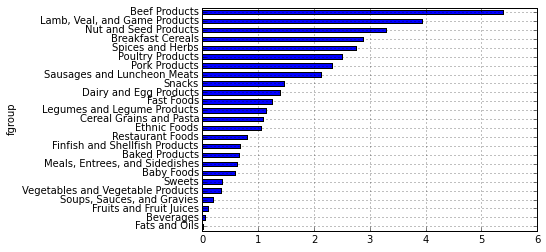

In [31]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].\
    quantile(0.5)
result['Zinc, Zn'].order().plot(kind='barh')

각 영양소가 많이 들어있는 음식

In [32]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

아미노산(Amino acids)가 많이 들어있는 음식 정보 선택

In [33]:
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 